In [1]:
# installing libraries
!pip install pandas numpy scikit-learn matplotlib seaborn

In [2]:
import pandas as pd

# Set file paths
file_path1 = r"C:\Users\jilow\Machine_learning_assignment1\Genetic_data\train.csv"
file_path2 = r"C:\Users\jilow\Machine_learning_assignment1\Genetic_data\test.csv"

# Combine the train and test data for exploration and cleaning
train_data = pd.read_csv(file_path2)  # Use file_path2 for train.csv
test_data = pd.read_csv(file_path1)   # Use file_path1 for test.csv

# Combine them into one dataset
data = pd.concat([train_data, test_data], axis=0)

# Preview the first few rows
print(data.head())

  Patient Id  Patient Age Genes in mother's side Inherited from father  \
0  PID0x4175          6.0                     No                   Yes   
1  PID0x21f5         10.0                    Yes                    No   
2  PID0x49b8          5.0                     No                   NaN   
3  PID0x2d97         13.0                     No                   Yes   
4  PID0x58da          5.0                     No                   NaN   

  Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name  \
0            No            No                4.981655            Charles   
1           NaN           Yes                5.118890          Catherine   
2            No            No                4.876204              James   
3           Yes            No                4.687767              Brian   
4           NaN           Yes                5.152362               Gary   

  Family Name Father's name  ...  Birth defects  \
0         NaN          Kore  ...       Multiple

In [3]:
# EDA: Summary of the data
print(data.describe())

        Patient Age  Blood cell count (mcL)  Mother's age  Father's age  \
count  30121.000000            31548.000000  25512.000000  25562.000000   
mean       6.995418                4.899272     34.544646     41.920233   
std        4.325345                0.199510      9.845861     13.037442   
min        0.000000                4.092727     18.000000     20.000000   
25%        3.000000                4.763948     26.000000     30.000000   
50%        7.000000                4.899315     35.000000     42.000000   
75%       11.000000                5.033619     43.000000     53.000000   
max       14.000000                5.676184     51.000000     64.000000   

             Test 1        Test 2        Test 3        Test 4        Test 5  \
count  29421.000000  29396.000000  29401.000000  29408.000000  29378.000000   
mean      -7.133680     -7.008403     -7.067821     -6.079706     -7.046395   
std       25.600141     25.391654     25.490827     25.648991     25.455127   
min     

In [4]:
# Check for missing data in the target and feature columns
print(data[['Genetic Disorder', 'Patient Age']].isnull().sum())

# Check for unique values in the target variable
print(data['Genetic Disorder'].unique())

Genetic Disorder    11611
Patient Age          1427
dtype: int64
[nan 'Mitochondrial genetic inheritance disorders'
 'Multifactorial genetic inheritance disorders'
 'Single-gene inheritance diseases']


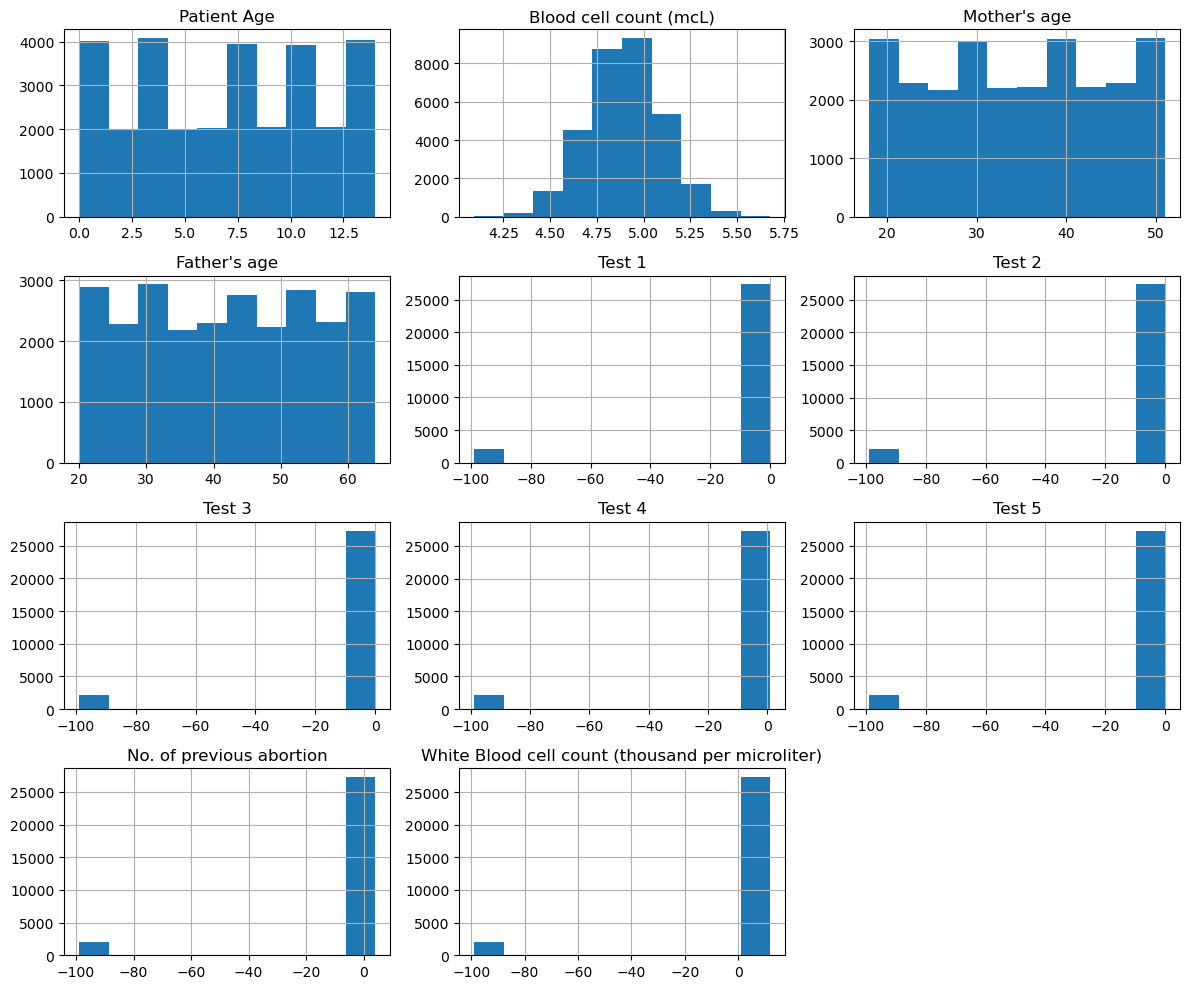

In [5]:
#EDA: understand data distribution of numerical features
import matplotlib.pyplot as plt
data.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

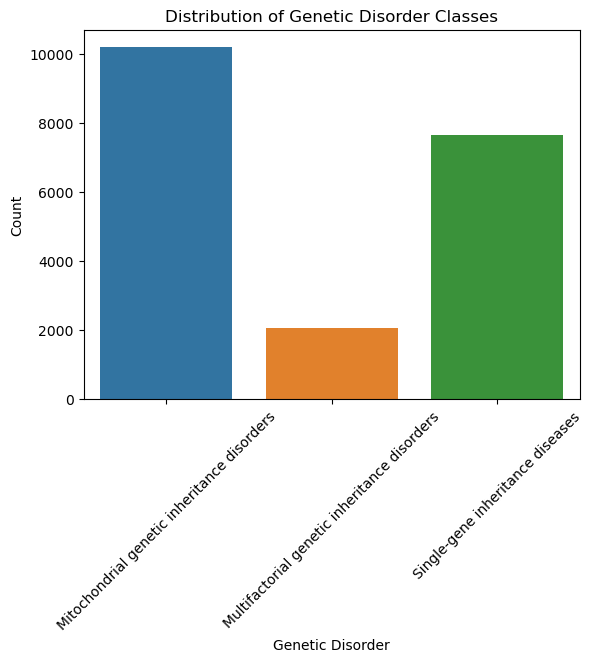

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for the target variable
sns.countplot(x='Genetic Disorder', data=data)
plt.title('Distribution of Genetic Disorder Classes')
plt.xlabel('Genetic Disorder')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

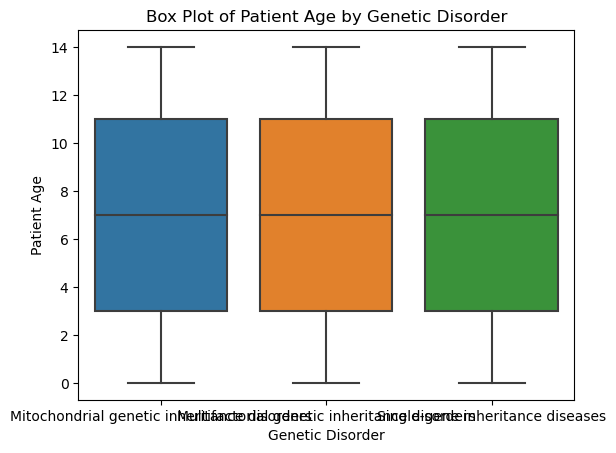

In [8]:
# Example: Patient Age vs. Genetic Disorder
sns.boxplot(x='Genetic Disorder', y='Patient Age', data=data)
plt.title('Box Plot of Patient Age by Genetic Disorder')
plt.show()

Index(['Patient Age', 'Blood cell count (mcL)', 'Mother's age', 'Father's age',
       'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5',
       'No. of previous abortion',
       'White Blood cell count (thousand per microliter)'],
      dtype='object')


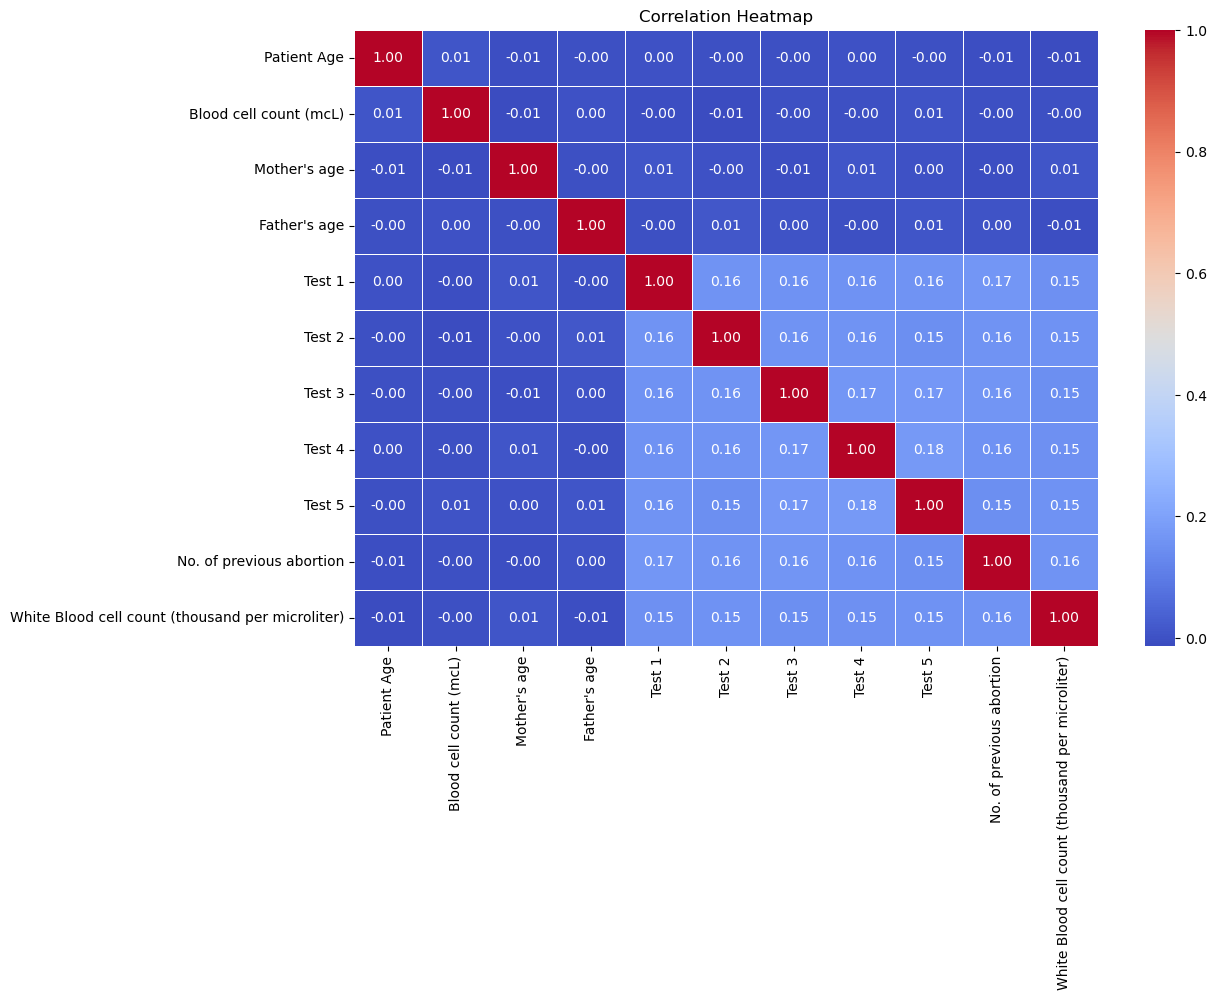

In [11]:
# Identify numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Check the numerical columns
print(numerical_cols)

# Correlation matrix
correlation_matrix = data[numerical_cols].corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [15]:
# Data cleaning: remove invalid value
#Replace -99 with NaN for proper matching
data.replace(-99, np.nan, inplace=True)

# Check the percentage of missing values
missing_percentage = data.isnull().mean() * 100
print("Percentage of missing values per column:")
print(missing_percentage)

# Imputing missing values for numerical features, using median imputation
num_features = ['Patient Age', 'Blood cell count (mcL)', 'Mother\'s age', 'Father\'s age',
                'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5',
                'No. of previous abortion', 'White Blood cell count (thousand per microliter)']
for col in num_features:
    data[col].fillna(data[col].median(), inplace=True)

# Create a new feature: Parental Average Age
data['Parental Average Age'] = (data['Mother\'s age'] + data['Father\'s age']) / 2

# Verify the dataset after cleaning
print("Data after cleaning:")
print(data.head())


Percentage of missing values per column:
Patient Id                                           0.000000
Patient Age                                          0.000000
Genes in mother's side                               0.000000
Inherited from father                                2.716495
Maternal gene                                       20.708127
Paternal gene                                        0.000000
Blood cell count (mcL)                               0.000000
Patient First Name                                   0.000000
Family Name                                         60.251046
Father's name                                        0.000000
Mother's age                                         0.000000
Father's age                                         0.000000
Institute Name                                      22.638519
Location of Institute                                0.000000
Status                                               0.000000
Respiratory Rate (breaths/min

In [12]:
# data cleaning
print("\n Missing values: ", data.isnull().sum())# check missing values


 Missing values:  Patient Id                                              0
Patient Age                                          1427
Genes in mother's side                                  0
Inherited from father                                 857
Maternal gene                                        6533
Paternal gene                                           0
Blood cell count (mcL)                                  0
Patient First Name                                      0
Family Name                                         19008
Father's name                                           0
Mother's age                                         6036
Father's age                                         5986
Institute Name                                       7142
Location of Institute                                   0
Status                                                  0
Respiratory Rate (breaths/min)                       5035
Heart Rate (rates/min                                

In [16]:
# Impute missing values for categorical columns with the mode
categorical_cols = [
    'Gender', 'Birth asphyxia', 'Place of birth', 'Inherited from father', 'Maternal gene'
]
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Drop non-infomative columns
data.drop(['Patient Id', 'Patient First Name', 'Family Name'], axis=1, inplace=True)

In [38]:
# Map descriptive values to numbers
data['Respiratory Rate (breaths/min)'] = data['Respiratory Rate (breaths/min)'].map({
    'Normal (30-60)': 45,
    'Tachypnea': 65
})
data['Heart Rate (rates/min'] = data['Heart Rate (rates/min'].map({
    'Normal': 70,
    'Tachycardia': 100
})

# Fill missing values with the median
data['Respiratory Rate (breaths/min)'].fillna(data['Respiratory Rate (breaths/min)'].median(), inplace=True)
data['Heart Rate (rates/min'].fillna(data['Heart Rate (rates/min'].median(), inplace=True)

In [17]:
#Fill missing numerical columns with the median
data['Patient Age'].fillna(data['Patient Age'].median(), inplace=True)
data["Mother's age"].fillna(data["Mother's age"].median(), inplace=True)
data["Father's age"].fillna(data["Father's age"].median(), inplace=True)

In [ ]:
#Filling missing categorical values(Gender,Birth asphyxia,place of birth) with mode
categorical_cols=['Gender','Birth asphyxia','Place of birth']
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [19]:
#Check for missig values again
print("\n Remaining missing values \n")
print(data.isnull().sum())


 Remaining missing values 

Patient Age                                             0
Genes in mother's side                                  0
Inherited from father                                 857
Maternal gene                                        6533
Paternal gene                                           0
Blood cell count (mcL)                                  0
Father's name                                           0
Mother's age                                            0
Father's age                                            0
Institute Name                                       7142
Location of Institute                                   0
Status                                                  0
Respiratory Rate (breaths/min)                       5035
Heart Rate (rates/min                                5013
Test 1                                                  0
Test 2                                                  0
Test 3                                     

In [20]:
data['Inherited from father'].fillna(data['Inherited from father'].mode()[0], inplace=True)
data['Maternal gene'].fillna(data['Maternal gene'].mode()[0], inplace=True)

In [21]:
data.drop(['Institute Name', 'Symptom 2', 'Disorder Subclass'], axis=1, inplace=True)

In [25]:
# Fill missing test results with 0
test_cols = ['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5']
data[test_cols] = data[test_cols].fillna(0)

In [26]:
# Fill missing values with the median
data['White Blood cell count (thousand per microliter)'].fillna(
    data['White Blood cell count (thousand per microliter)'].median(), inplace=True)

In [27]:
#Check for missig values again
print("\n Remaining missing values \n")
print(data.isnull().sum())


 Remaining missing values 

Patient Age                                             0
Genes in mother's side                                  0
Inherited from father                                   0
Maternal gene                                           0
Paternal gene                                           0
Blood cell count (mcL)                                  0
Father's name                                           0
Mother's age                                            0
Father's age                                            0
Location of Institute                                   0
Status                                                  0
Respiratory Rate (breaths/min)                          0
Heart Rate (rates/min                                   0
Test 1                                                  0
Test 2                                                  0
Test 3                                                  0
Test 4                                     

In [49]:
num_cols = ['Respiratory Rate (breaths/min)', 'Heart Rate (rates/min',
            'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5',
            'White Blood cell count (thousand per microliter)', 'Blood test result']

# Convert to numeric, replacing non-numeric values with NaN
for col in num_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Fill missing values with the median
for col in num_cols:
    data[col].fillna(data[col].median(), inplace=True)


In [51]:
# List of numerical columns
num_cols = ['Respiratory Rate (breaths/min)', 'Heart Rate (rates/min',
            'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5',
            'White Blood cell count (thousand per microliter)', 'Blood test result']

# Convert columns to numeric, replacing non-numeric values with NaN
for col in num_cols:
    if col in data.columns:  # Process only if the column exists
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Fill missing values with the median for existing numerical columns
for col in num_cols:
    if col in data.columns:
        data[col].fillna(data[col].median(), inplace=True)


In [48]:
# Step 1: Handle numeric columns
num_cols = ['Respiratory Rate (breaths/min)', 'Heart Rate (rates/min',
            'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5',
            'White Blood cell count (thousand per microliter)', 'Blood test result']

for col in num_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    data[col].fillna(data[col].median(), inplace=True)

# Step 2: Handle categorical columns
cat_cols = data.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)  # Or use 'Unknown' if preferred

# Step 3: Drop any remaining rows/columns with excessive missing values
data.dropna(inplace=True)  # Drop rows with any remaining missing values (optional)

# Step 4: Check for any remaining missing values
print(data.isnull().sum().sum())  # Should print 0 if all missing values are handled


0.0


In [53]:
# Verify that all missing values are handled
print("\nRemaining Missing Values:\n")
print(data.isnull().sum())


Remaining Missing Values:

Patient Age                                         0.0
Genes in mother's side                              0.0
Inherited from father                               0.0
Maternal gene                                       0.0
Paternal gene                                       0.0
Blood cell count (mcL)                              0.0
Father's name                                       0.0
Mother's age                                        0.0
Father's age                                        0.0
Location of Institute                               0.0
Status                                              0.0
Respiratory Rate (breaths/min)                      0.0
Heart Rate (rates/min                               0.0
Test 1                                              0.0
Test 2                                              0.0
Test 3                                              0.0
Test 4                                              0.0
Test 5              

In [36]:
# Map target variable to binary values
data['Genetic Disorder'] = data['Genetic Disorder'].apply(
    lambda x: 'Present' if x != 'None' else 'Not Present'
)
print(data['Genetic Disorder'].value_counts())

Present    31548
Name: Genetic Disorder, dtype: int64


In [37]:
from sklearn.preprocessing import LabelEncoder
# to encode the binary target
label_encoder=LabelEncoder()
data['Genetic Disorder']=label_encoder.fit_transform(data['Genetic Disorder'])
print("\n Encoded Target Distribution")
print(data['Genetic Disorder'].value_counts())


 Encoded Target Distribution
0    31548
Name: Genetic Disorder, dtype: int64


In [64]:
# Map Genetic Disorder to a binary column
data['Genetic Disorder Binary'] = data['Genetic Disorder'].map({
    'Single-gene inheritance diseases': 1,
    'Mitochondrial genetic inheritance disorders': 1,
    'Multifactorial genetic inheritance disorders': 1,
    'No genetic disorder': 0  # If 'No genetic disorder' exists
})

# Verify the transformation
print(data['Genetic Disorder Binary'].value_counts())


Series([], Name: Genetic Disorder Binary, dtype: int64)


In [59]:
# Create Parent Age Difference
data['Parent Age Difference'] = data['Father\'s age'] - data['Mother\'s age']

# Create Total Test Score
test_cols = ['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5']
data['Total Test Score'] = data[test_cols].sum(axis=1)


In [60]:
# Verify that all missing values are handled
print("\nRemaining Missing Values:\n")
print(data.isnull().sum())


Remaining Missing Values:

Patient Age                                         0.0
Genes in mother's side                              0.0
Inherited from father                               0.0
Maternal gene                                       0.0
Paternal gene                                       0.0
Blood cell count (mcL)                              0.0
Father's name                                       0.0
Mother's age                                        0.0
Father's age                                        0.0
Location of Institute                               0.0
Status                                              0.0
Respiratory Rate (breaths/min)                      0.0
Heart Rate (rates/min                               0.0
Test 1                                              0.0
Test 2                                              0.0
Test 3                                              0.0
Test 4                                              0.0
Test 5              

In [67]:
print(data.columns)

Index(['Patient Age', 'Genes in mother's side', 'Inherited from father',
       'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)',
       'Father's name', 'Mother's age', 'Father's age',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 3', 'Symptom 4', 'Symptom 5', 'Genetic Disorder',
       'Parental Average Age', 'Parent Age Difference', 'Total Test Score',
       'Genetic Disorder Binary'],
     

In [66]:
from sklearn.model_selection import train_test_split

# Features and target
X = data.drop(columns=['Genetic Disorder', 'Genetic Disorder Binary'])  # Features
y = data['Genetic Disorder Binary']  # Target

# Train-Test split (85% train+validation, 15% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Train-Validation split (70% train, 15% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)

# Verify splits
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")



ValueError: With n_samples=0, test_size=0.15 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [68]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (0, 39)
Shape of y: (0,)


In [69]:
print(data['Genetic Disorder Binary'].head())
print(data['Genetic Disorder Binary'].unique())  # Check for valid binary values (0 and 1)


Series([], Name: Genetic Disorder Binary, dtype: int64)
[]


In [70]:
print(data.columns)


Index(['Patient Age', 'Genes in mother's side', 'Inherited from father',
       'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)',
       'Father's name', 'Mother's age', 'Father's age',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 3', 'Symptom 4', 'Symptom 5', 'Genetic Disorder',
       'Parental Average Age', 'Parent Age Difference', 'Total Test Score',
       'Genetic Disorder Binary'],
     

In [71]:
# Drop non-feature columns (adjust based on actual column names)
X = data.drop(columns=['Genetic Disorder', 'Genetic Disorder Binary', 'Father\'s name'])  # Features
y = data['Genetic Disorder Binary']  # Target


In [72]:
print("Shape of X after adjustment:", X.shape)
print("Shape of y after adjustment:", y.shape)


Shape of X after adjustment: (0, 38)
Shape of y after adjustment: (0,)


In [73]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Further split train+validation into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)

# Verify splits
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


ValueError: With n_samples=0, test_size=0.15 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [80]:
# Check the unique values in the 'Genetic Disorder' column
print(data['Genetic Disorder'].unique())


[]


In [85]:
# Check the unique values in the 'Genetic Disorder' column
print(data['Genetic Disorder'].unique())

# Map 'Genetic Disorder' to binary
data['Genetic Disorder Binary'] = data['Genetic Disorder'].map({
    'Single-gene inheritance diseases': 1,
    'Mitochondrial genetic inheritance disorders': 1,
    'Multifactorial genetic inheritance disorders': 1,
    'No genetic disorder': 0  # If this category exists
})

# Check the unique values in the new binary column
print(data['Genetic Disorder Binary'].unique())

# Check for any missing values (NaNs) in the 'Genetic Disorder Binary' column
print(data['Genetic Disorder Binary'].isnull().sum())


[]
[]
0


In [86]:
# Adjust the mapping based on the actual unique values in 'Genetic Disorder'
data['Genetic Disorder Binary'] = data['Genetic Disorder'].map({
    'Single-gene inheritance diseases': 1,
    'Mitochondrial genetic inheritance disorders': 1,
    'Multifactorial genetic inheritance disorders': 1,
    'No genetic disorder': 0  # Adjust based on actual categories
})

# Check the new 'Genetic Disorder Binary' column
print(data['Genetic Disorder Binary'].value_counts())


Series([], Name: Genetic Disorder Binary, dtype: int64)


In [96]:
# Remove any leading/trailing spaces from the 'Genetic Disorder' column
data['Genetic Disorder'] = data['Genetic Disorder'].str.strip()

# Optionally, replace any unexpected characters
data['Genetic Disorder'] = data['Genetic Disorder'].replace({'single-gene inheritance diseases': 'Single-gene inheritance diseases'}, regex=True)

# Check the unique values again
print(data['Genetic Disorder'].unique())


[]


In [92]:
# Convert the 'Genetic Disorder' column to strings and remove leading/trailing spaces
data['Genetic Disorder'] = data['Genetic Disorder'].astype(str).str.strip()

# Optionally, replace any unexpected characters or fix inconsistent text
data['Genetic Disorder'] = data['Genetic Disorder'].replace({'single-gene inheritance diseases': 'Single-gene inheritance diseases'}, regex=True)

# Check the unique values again
print(data['Genetic Disorder'].unique())


[]


In [93]:
# Map Genetic Disorder to binary
data['Genetic Disorder Binary'] = data['Genetic Disorder'].map({
    'Single-gene inheritance diseases': 1,
    'Mitochondrial genetic inheritance disorders': 1,
    'Multifactorial genetic inheritance disorders': 1,
    'No genetic disorder': 0  # Ensure this matches exactly as it appears in the dataset
})

# Verify that the 'Genetic Disorder Binary' column is populated
print(data['Genetic Disorder Binary'].value_counts())


Series([], Name: Genetic Disorder Binary, dtype: int64)


In [94]:
# Fill NaN values with 0 (or another default value)
data['Genetic Disorder Binary'].fillna(0, inplace=True)

# Verify
print(data['Genetic Disorder Binary'].value_counts())


Series([], Name: Genetic Disorder Binary, dtype: int64)


In [90]:
# Define features (excluding target columns)
X = data.drop(columns=['Genetic Disorder', 'Genetic Disorder Binary', 'Father\'s name'])  # Adjust based on columns
y = data['Genetic Disorder Binary']

# Check the shapes of X and y
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Ensure there are no NaN values in features
print(X.isnull().sum())
print(y.isnull().sum())


Shape of X: (0, 38)
Shape of y: (0,)
Patient Age                                         0.0
Genes in mother's side                              0.0
Inherited from father                               0.0
Maternal gene                                       0.0
Paternal gene                                       0.0
Blood cell count (mcL)                              0.0
Mother's age                                        0.0
Father's age                                        0.0
Location of Institute                               0.0
Status                                              0.0
Respiratory Rate (breaths/min)                      0.0
Heart Rate (rates/min                               0.0
Test 1                                              0.0
Test 2                                              0.0
Test 3                                              0.0
Test 4                                              0.0
Test 5                                              0.0
Parental co

In [98]:
from sklearn.model_selection import train_test_split

# Split the dataset into training+validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training+validation set into training and validation sets (70% train, 30% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)

# Verify the split sizes
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")



ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [99]:
# Inspect the merged dataset for any missing values in key columns
print(data['Genetic Disorder'].unique())  # Should contain categories
print(data['Genetic Disorder Binary'].unique())  # Should contain 0 and 1


[]
[]


In [100]:
# Check for missing values in the 'Genetic Disorder' column
print(data['Genetic Disorder'].isnull().sum())  # Should be 0 if there are no NaNs

# Check the unique values in the 'Genetic Disorder' column
print(data['Genetic Disorder'].unique())


0
[]


In [101]:
# Check the first few rows of the original datasets (train and test)
print("Train Data:")
print(train_data.head())

print("Test Data:")
print(test_data.head())

# Check if the 'Genetic Disorder' column exists in both datasets
print("Train Data - Genetic Disorder column:")
print(train_data['Genetic Disorder'].unique())

print("Test Data - Genetic Disorder column:")
print(test_data['Genetic Disorder'].unique())


Train Data:
  Patient Id  Patient Age Genes in mother's side Inherited from father  \
0  PID0x4175            6                     No                   Yes   
1  PID0x21f5           10                    Yes                    No   
2  PID0x49b8            5                     No                   NaN   
3  PID0x2d97           13                     No                   Yes   
4  PID0x58da            5                     No                   NaN   

  Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name  \
0            No            No                4.981655            Charles   
1           NaN           Yes                5.118890          Catherine   
2            No            No                4.876204              James   
3           Yes            No                4.687767              Brian   
4           NaN           Yes                5.152362               Gary   

  Family Name Father's name  ...  \
0         NaN          Kore  ...   
1         NaN 

KeyError: 'Genetic Disorder'

In [102]:
# Check the column names in the train and test datasets
print("Train Data Columns:")
print(train_data.columns)

print("Test Data Columns:")
print(test_data.columns)


Train Data Columns:
Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom

In [103]:
# Extract the 'Genetic Disorder' column from the test data
genetic_disorder_test = test_data['Genetic Disorder']

# If there's a way to map this to the train dataset, you could do so here.
# If you want to assign the same values for the train dataset, you can simply add it.
train_data['Genetic Disorder'] = genetic_disorder_test

# Check if 'Genetic Disorder' is now in the train dataset
print(train_data['Genetic Disorder'].unique())


['Mitochondrial genetic inheritance disorders' nan
 'Multifactorial genetic inheritance disorders'
 'Single-gene inheritance diseases']


In [104]:
# Map 'Genetic Disorder' to binary
train_data['Genetic Disorder Binary'] = train_data['Genetic Disorder'].map({
    'Single-gene inheritance diseases': 1,
    'Mitochondrial genetic inheritance disorders': 1,
    'Multifactorial genetic inheritance disorders': 1,
    'No genetic disorder': 0  # Adjust based on actual categories
})

# Check the mapping result
print(train_data['Genetic Disorder Binary'].value_counts())


1.0    8527
Name: Genetic Disorder Binary, dtype: int64


In [105]:
# Define features and target for train data
X = train_data.drop(columns=['Genetic Disorder', 'Genetic Disorder Binary'])
y = train_data['Genetic Disorder Binary']

# Check the shape and integrity
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Check for missing values
print(X.isnull().sum())
print(y.isnull().sum())


Shape of X: (9465, 43)
Shape of y: (9465,)
Patient Id                                             0
Patient Age                                            0
Genes in mother's side                                 0
Inherited from father                                551
Maternal gene                                       3723
Paternal gene                                          0
Blood cell count (mcL)                                 0
Patient First Name                                     0
Family Name                                         9317
Father's name                                          0
Mother's age                                           0
Father's age                                           0
Institute Name                                      2036
Location of Institute                                  0
Status                                                 0
Respiratory Rate (breaths/min)                      2886
Heart Rate (rates/min                        

In [106]:
from sklearn.model_selection import train_test_split

# Split the dataset into training+validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training+validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)

# Verify the split sizes
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 5300
Validation set size: 2272
Test set size: 1893


In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on training set
y_train_pred = dt_model.predict(X_train)

# Predict on validation set
y_val_pred = dt_model.predict(X_val)

# Evaluate on the training set
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

# Evaluate on the validation set
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

# Classification report for validation set
print("\nClassification Report (Validation Set):\n")
print(classification_report(y_val, y_val_pred))


ValueError: could not convert string to float: 'PID0x99ef'

In [108]:
# Identify non-numeric columns
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

# Remove non-numeric columns from the feature set
X_train_cleaned = X_train.drop(columns=non_numeric_cols)
X_val_cleaned = X_val.drop(columns=non_numeric_cols)
X_test_cleaned = X_test.drop(columns=non_numeric_cols)

# Verify that the data is now numeric
print(X_train_cleaned.head())


Non-numeric columns: Index(['Patient Id', 'Genes in mother's side', 'Inherited from father',
       'Maternal gene', 'Paternal gene', 'Patient First Name', 'Family Name',
       'Father's name', 'Institute Name', 'Location of Institute', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min',
       'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies', 'Birth defects',
       'Blood test result'],
      dtype='object')
      Patient Age  Blood cell count (mcL)  Mother's age  Father's age  Test 1  \
7280           14                4.893616            40            62       0   
6716           10                5.144968            37            25       0  

In [109]:
# Apply One-Hot Encoding to categorical columns
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_val_encoded = pd.get_dummies(X_val, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Verify that the encoding worked
print(X_train_encoded.head())


      Patient Age  Blood cell count (mcL)  Mother's age  Father's age  Test 1  \
7280           14                4.893616            40            62       0   
6716           10                5.144968            37            25       0   
6332           12                4.867413            18            41       0   
1634            0                4.839710            24            31     -99   
1625            4                4.973863            30            63     -99   

      Test 2  Test 3  Test 4  Test 5  No. of previous abortion  ...  \
7280       0       0       1       0                       -99  ...   
6716       0       0     -99       0                         0  ...   
6332       0     -99     -99       0                         3  ...   
1634       0       0       1     -99                       -99  ...   
1625       0       0       1       0                       -99  ...   

      Assisted conception IVF/ART_No  Assisted conception IVF/ART_Yes  \
7280         

In [110]:
from sklearn.preprocessing import LabelEncoder

# Label encode any categorical columns (if applicable)
label_encoder = LabelEncoder()

# Example: Label encode the 'Gender' column (if applicable)
X_train['Gender'] = label_encoder.fit_transform(X_train['Gender'])
X_val['Gender'] = label_encoder.transform(X_val['Gender'])
X_test['Gender'] = label_encoder.transform(X_test['Gender'])


In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_cleaned, y_train)

# Predict on training and validation sets
y_train_pred = dt_model.predict(X_train_cleaned)
y_val_pred = dt_model.predict(X_val_cleaned)

# Evaluate on the training set
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

# Evaluate on the validation set
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

# Classification report for validation set
print("\nClassification Report (Validation Set):\n")
print(classification_report(y_val, y_val_pred))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [112]:
# Check for NaN values in the feature set
print(X_train_cleaned.isnull().sum())  # For training set
print(X_val_cleaned.isnull().sum())  # For validation set
print(X_test_cleaned.isnull().sum())  # For test set


Patient Age                                         0
Blood cell count (mcL)                              0
Mother's age                                        0
Father's age                                        0
Test 1                                              0
Test 2                                              0
Test 3                                              0
Test 4                                              0
Test 5                                              0
No. of previous abortion                            0
White Blood cell count (thousand per microliter)    0
Symptom 1                                           0
Symptom 2                                           0
Symptom 3                                           0
Symptom 4                                           0
Symptom 5                                           0
dtype: int64
Patient Age                                         0
Blood cell count (mcL)                              0
Mother's age   